<a href="https://colab.research.google.com/github/ASHISHVERMA114142/ML_Projects/blob/main/assignment_iris_kmeans_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**linear regression**

1. loading the data and getting overview of data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('AirfoilSelfNoise.csv')
data.head()

FileNotFoundError: ignored

In [ ]:
# here 30 rows and 2 cols are there in the data set...
data.shape

(30, 2)

In [ ]:
data.describe()
#describe() function describes about data set...

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(data)

In [ ]:
data= pd.DataFrame(scaled_features,columns=data.columns)
data

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781
5,-0.864935,-0.718307
6,-0.829096,-0.588158
7,-0.757416,-0.799817
8,-0.757416,-0.428810
9,-0.578216,-0.698013


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


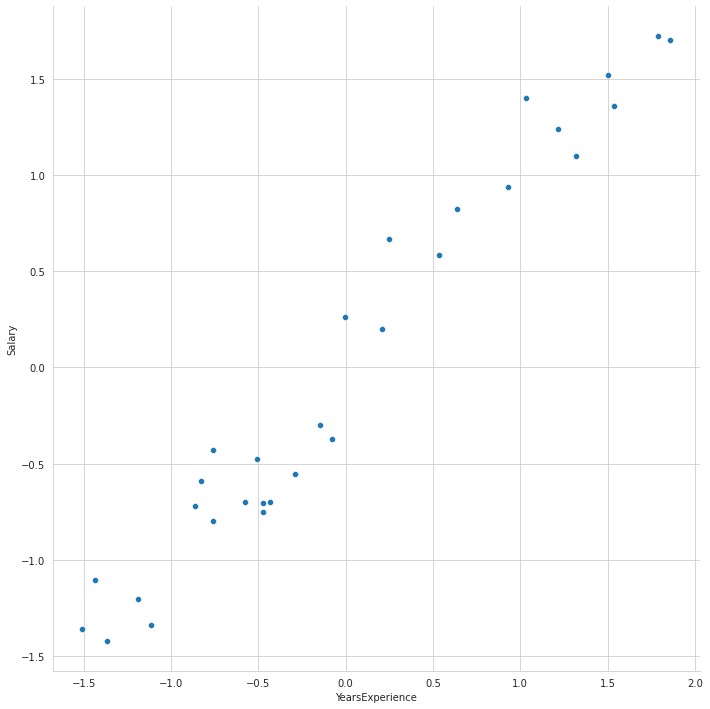

In [ ]:
sns.pairplot(y_vars = 'Salary', x_vars = 'YearsExperience' ,data = data,size=10)

this plot shows that it is possible to draw the line to get minimum fit line...

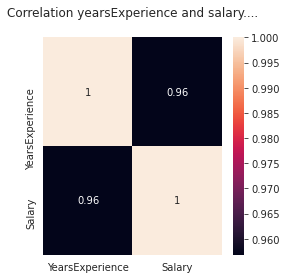

In [ ]:
corr = data.corr(method='spearman')
plt.figure(figsize=(4,4))
plt.title("Correlation yearsExperience and salary....\n")
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
# print(X)

here separating the value of salary and experience in the separate data frame...

In [ ]:
X_train,X_test,y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)
# X_test,X_validation,y_test, y_validation = train_test_split(X_test,y_test, train_size = 0.5, test_size = 0.5, random_state = 100)

dividing the data into training testing and validation set

In [ ]:
X_train.shape
# print(X_test)

(21, 1)

In [ ]:
print(X_test.shape)
# X_validation.shape

(9, 1)


In [ ]:
done = LinearRegression()
done.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

now training of my linear regression model using traing data.

In [ ]:
y_pred = done.predict(X_test)
# salarys predicted value....
print(y_pred)
# sum=0;
# for x in y_pred:
#   sum=sum+x;
# print("mean salary = ",sum/4)

[-0.54889256  1.54510888  1.83393666 -0.40447867 -0.83772034 -0.44058214
  1.58121235  1.36459151 -0.80161687]


Now we apply test data on our model then it gives our predicted salary. In the predicted salary there is one outlier that may effect our model so futher we will calculate the mean sqare error to get an idea what is the performence of our model...

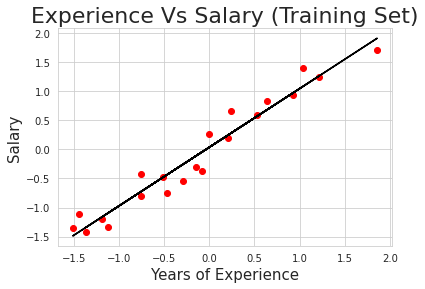

In [ ]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, done.predict(X_train), color='black')
plt.title('Experience Vs Salary (Training Set)', size=22)
plt.xlabel('Years of Experience', size=15)
plt.ylabel('Salary', size=15)
plt.show()

This is the graphical represention of our model it shows that out line is good but without checking error rate we can't say anything...

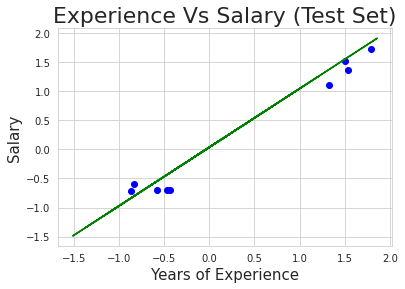

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, done.predict(X_train), color='green')
plt.title('Experience Vs Salary (Test Set)', size=22)
plt.xlabel('Years of Experience', size=15)
plt.ylabel('Salary', size=15)
plt.show()


this is graphical representation of our test set
blue dots are our testing points.
out of 4 data points three are near to line but one is very far from the line ...

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
#Calculating mean square error
mean = mean_squared_error(y_test, y_pred)
print('Mean Squared Error = ', mean)

Mean Squared Error =  0.041721032133034845


In [ ]:
# mean square root error...
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

0.20425726947414832

In [ ]:
r2_score(y_test,y_pred)

0.9627668685473266

In [ ]:
print(done.coef_)
print(done.intercept_)

[1.00735519]
0.0335768070377193


**KNN**

In [ ]:
# Import Libraries

import numpy as np  
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

Importing all the libriery that are required...

In [ ]:
# Reading the data
df = pd.read_csv('Iris.csv')

loading the iris data set 

In [ ]:
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


checking other statical properties of data frame...

In [ ]:
# Check few records
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# get to know about number of species (classes)
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# if there is any NAN value
df.isnull().values.any()

False

This data set is very good there is no missing value.

In [ ]:
# check the distribution of the class 
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


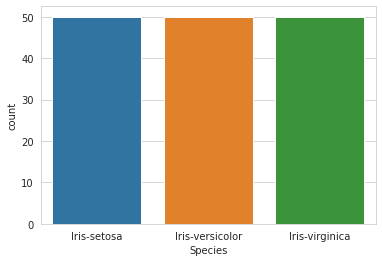

In [ ]:
sns.countplot(df['Species'])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


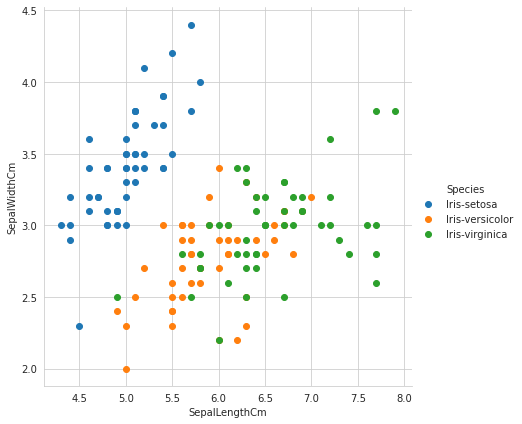

In [ ]:
#2--D Plot with colour-coding for each flower type
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Species', size=6).map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()

as we can see that sepallength and sepalwidth of iris setosa are different form other two and clearly identified but the other two has overlaping points ...

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


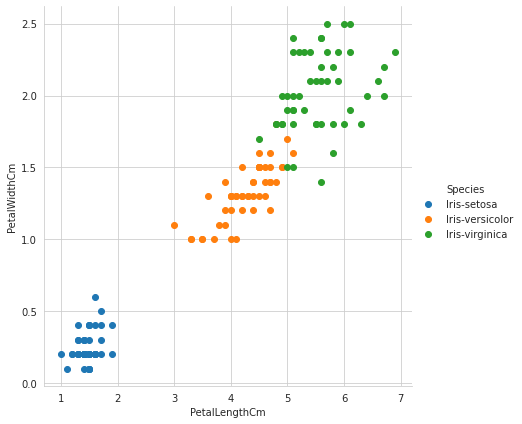

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Species', size=6).map(plt.scatter, 'PetalLengthCm', 'PetalWidthCm').add_legend()

as we can see that petallength and petalwidth of iris setosa are different form other two and clearly identified but the other two has overlaping points ...

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


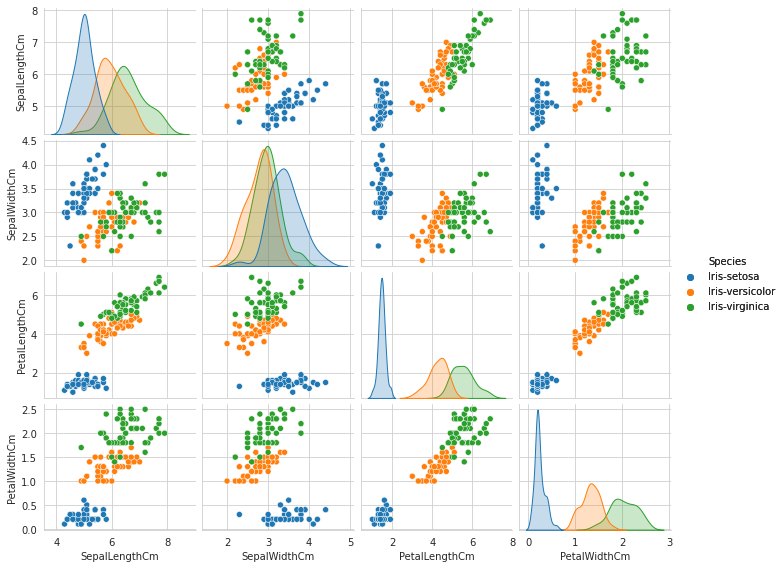

In [ ]:
k=df.drop('Id', axis=1)
sns.pairplot(k, hue='Species', size=2).add_legend()

1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virginica and Versicolor have some overlap (almost linearly seperable).

In [ ]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
#One Hot Enconding For Different Species // Convert categorical label to numerical

for column in df.columns:
    if df[column].dtype == np.number:
        continue
df[column] = LabelEncoder().fit_transform(df[column])        
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


here we are giving lebeling to the catogorical values ...
labelEncoder is giving numerical value to the catogorical values...

In [ ]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
#seperating Features

X = df.drop(['Species'],axis = 1)
y = df['Species']

In [ ]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [ ]:
#Splitting Dataset into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
#Selecting different Ks in range [1,11] and choose the one with high accuracy

k_range = list(range(1,11))
acc = []
for i in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))

In [ ]:
acc

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777]

We can see that for most of the k values  we are getting 100 % accuracy.

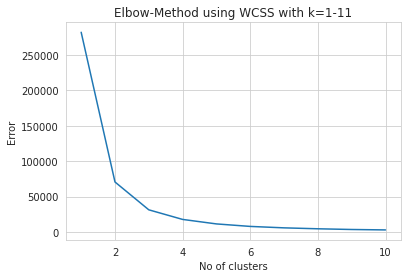

In [ ]:
Error=[]
for i in range(1, 11):
    kmeans11 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(x)
    kmeans11.fit(x)
    Error.append(kmeans11.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow-Method using WCSS with k=1-11')
plt.xlabel('No of clusters')
plt.ylabel('Error') #within cluster sum of squares
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = knn.predict(X_test)

ValueError: ignored

In [ ]:
metrics.accuracy_score(y_test, y_pred)

1.0

This gives our Kmeans model's accuracy score that 100% ...

**KMEANS**

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Loading all the important libraries that are required...

In [ ]:
iris = pd.read_csv('Iris.csv')

loading Iris.csv file 

In [ ]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


As we can see that there are four properties of iris flower that are SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm and three species are there  Iris-virginica , Iris-setosa , Iris-versicolor . 

Here our aim is that build a model that that divide the our data set into three species according to their properties...


In [ ]:
# loading all the numerical properties of the data on a separate data file...
df=iris
x = iris.iloc[:,:-1].values
x

Now we are trying to see how our data looks likes in the graphical manner it help us to make further classification so we are using multivarient analysis 


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


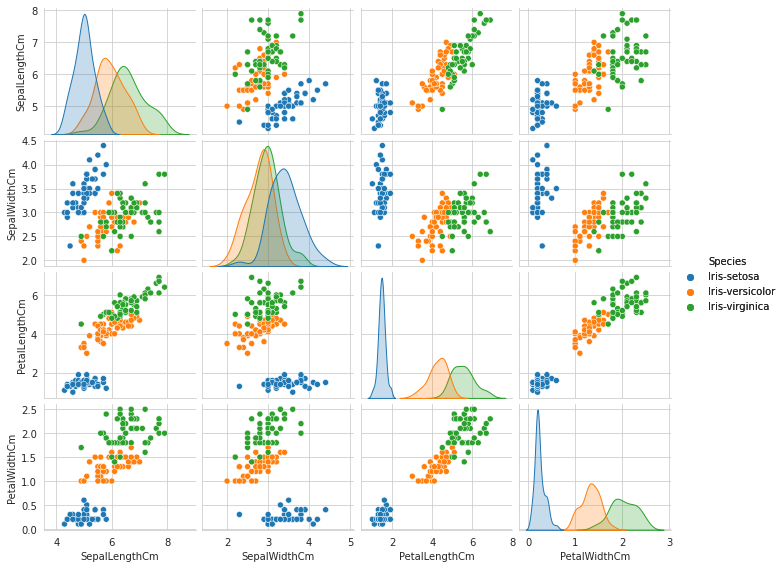

In [ ]:
k=iris.drop('Id', axis=1)
sns.pairplot(k, hue='Species', size=2).add_legend()

As we can see that iris-setosa can be easily identified there is only few overlappings with the properties of the other iris flowers ....
so we can derive a line to separate them form the other two flowers...


**Here marginal distribution curve also giving very much idea about the different properties of the iris flowers **

The probability of one event in the presence of all (or a subset of) outcomes of the other random variable is called the marginal probability or the marginal distribution. The marginal probability of one random variable in the presence of additional random variables is referred to as the marginal probability distribution.

** Using the elbow method to estimate the value k**


In [ ]:
kmeans5 = KMeans(n_clusters=5)
y = kmeans5.fit_predict(x)
print(y)
#  all the predicted values are stored in the Y that will be between 0 to 4...

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Now at this point we don't know how many clusters are required so we divide this clusters into 5 clusters ... after dividing in 5 clusters we will try do minimize this cluster count...

In [ ]:
kmeans5.cluster_centers_

array([[ 76.5       ,   5.99666667,   2.77      ,   4.33      ,
          1.34666667],
       [ 16.        ,   5.01935484,   3.43870968,   1.47741935,
          0.24516129],
       [135.5       ,   6.60666667,   3.01      ,   5.48333333,
          2.01333333],
       [ 46.5       ,   5.35666667,   3.16666667,   2.48666667,
          0.64666667],
       [106.        ,   6.27931034,   2.86551724,   5.13793103,
          1.79310345]])

After dividing into five clusters we can find their centers which will help us to how data is spread around the centre of each cluster...

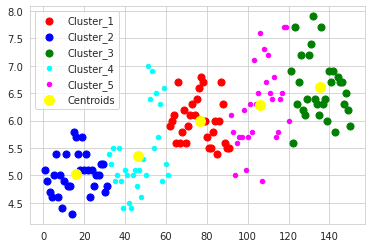

In [ ]:
#x[y==0,0] finds all the rows of x that have a y value of 0 (y == 0), and are in the first column of X i.e sepal length
# Similarly  x[y==0,1] finds all the rows of x that have a y value of 0 (y == 0), and are in the second column of X i.e sepal width
plt.scatter(x[y == 0,0], x[y==0,1], s = 50, c= 'red', label = 'Cluster_1')
plt.scatter(x[y == 1,0], x[y==1,1], s = 50, c= 'blue', label = 'Cluster_2')
plt.scatter(x[y == 2,0], x[y==2,1], s = 50, c= 'green', label = 'Cluster_3')
plt.scatter(x[y == 3,0], x[y==3,1], s = 20, c= 'cyan', label = 'Cluster_4')
plt.scatter(x[y == 4,0], x[y==4,1], s = 20, c= 'magenta', label = 'Cluster_5')

plt.scatter(kmeans5.cluster_centers_[:,0], kmeans5.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()


as we can see that cluter 1,5 are evenly distributed around their centre but cluster 2,3,4 are not evenly distributed around their centre so we will try elbow method to find the best fit number of clusters...


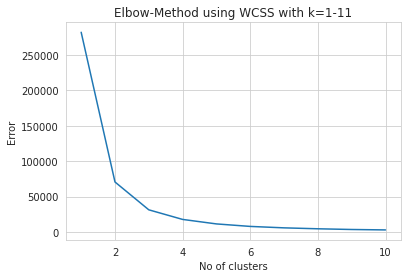

In [ ]:
Error=[]
for i in range(1, 11):
    kmeans11 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(x)
    kmeans11.fit(x)
    Error.append(kmeans11.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow-Method using WCSS with k=1-11')
plt.xlabel('No of clusters')
plt.ylabel('Error') #within cluster sum of squares
plt.show()

This Elbow method shows that there are two points at the second point that is at 3 we can see that after this point error are going to decreasing slowly...

In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=21)
y = kmeans3.fit_predict(x)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


Now we divide the data set into 3 clusters 

In [ ]:
kmeans3.cluster_centers_

array([[ 25.        ,   5.00612245,   3.42040816,   1.46530612,
          0.24489796],
       [125.        ,   6.57058824,   2.97058824,   5.52352941,
          2.01176471],
       [ 74.5       ,   5.922     ,   2.78      ,   4.206     ,
          1.304     ]])

Again we find the centre of the clusters 
there are 3 rows and four cols each row represent the centre of the four properties of the iris flower...

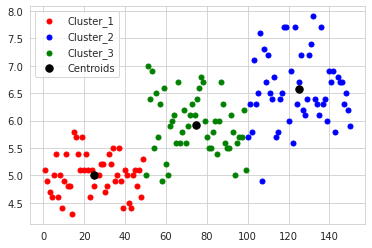

In [ ]:
plt.scatter(x[y == 0,0], x[y==0,1], s = 25, c= 'red', label = 'Cluster_1')
plt.scatter(x[y == 1,0], x[y==1,1], s = 25, c= 'blue', label = 'Cluster_2')
plt.scatter(x[y == 2,0], x[y==2,1], s = 25, c= 'green', label = 'Cluster_3')
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s = 55, c = 'black', label = 'Centroids')

plt.legend()

plt.show()

Now after plotting the scatter plot we can see that cluster 2 are linearly separable from the other two 
but clusters 1 and 3 has overlapping points some points on cluster 1 are near to the centroid of the clurster 2...


In [ ]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris=load_iris()
X_train,X_test,y_train,y_test= train_test_split(iris.data,iris.target)

Now we got the idea about number of cluster. now we are building the Kmeans model and then we will compare this model with

In [ ]:
model=KMeans(n_clusters=3)
model.fit(X_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
from sklearn import metrics
k=metrics.accuracy_score(y_test,model.predict(X_test));
k

0.7631578947368421

Now here we are using accuracy score that is the method in the sklearn 
using this we are tring to calculate accuracy score of our Kmeans model using  test data.

**now we will make another model knows are GMM (Guassian mixture model)
and try to compare with the KMEANS model...**

In [ ]:
from sklearn.mixture import GaussianMixture
newModel=GaussianMixture(n_components=3);
newModel.fit(X_train,y_train);

In [ ]:
k=metrics.accuracy_score(y_test,newModel.predict(X_test));
k

0.0

As we can see that the our KMeans model give much better accuracy score as compared to GMM .